In [ ]:
%%capture
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
"""!pip install rembg
!pip install rembg[gpu]
!pip install opencv-python
from rembg import remove
import cv2"""

In [ ]:
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = mpimg.imread(buf)
    return img

In [ ]:
def rem_back(suf):
  from rembg import remove
  import cv2

  image = Image.open(suf+'.png')
  #image = cv2.imread(im)
  width, height = image.size
  print(image.size)
  fracW = width / 6

  left = fracW
  right = 5 * fracW
  bottom = height
  top = height - (right - left)

  # Cropped image of above dimension
  # (It will not change original image)
  im1 = image.crop((left, top, right, bottom))

  new_image = im1.resize((640, 640))
  new_image = np.asarray(new_image)
  #new_image = rgb2gray(new_image)

  #im = np.array(im, dtype=np.uint8)
  #img = Image.fromarray(im)
   #im = np.array(im, dtype=np.uint8)
  result = remove(new_image) # Removing the background
  #a = np.asarray(result)
  #gray = rgb2gray(result)
  bgr = result[:,:,:3] # Channels 0..2
  gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
  bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
  alpha = result[:,:,3] # Channel 3
  result_bgr = np.dstack([bgr, alpha]) # Add the alpha channel

  cv2.imwrite('rm.png', result_bgr)

  return result_bgr

In [ ]:
  %%capture
  !pip install rembg
  !pip install rembg[gpu]
  !pip install opencv-python

In [ ]:
suf = 'im2'
im_w_back = rem_back(suf)


(2000, 1500)


In [ ]:
!pip uninstall --no-input rembg
!pip uninstall --no-input rembg[gpu]
!pip uninstall --no-input opencv-python

(640, 640, 4)


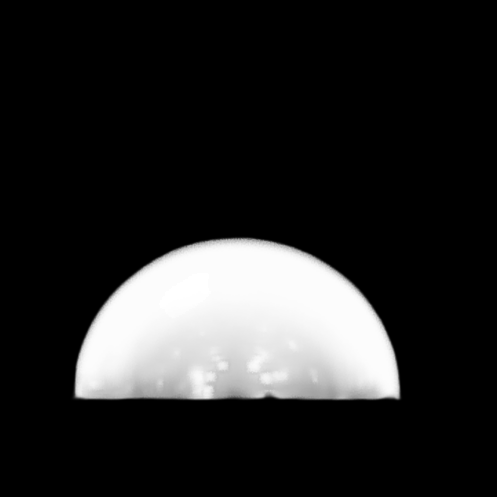

In [ ]:
sizex = 6.6666666667 * 1.33333334
sizey = sizex

fig, ax1 = plt.subplots(figsize=(sizex,sizey))
fig.set_facecolor('black')
ax1.axis('off')
ax1.imshow(im_w_back, cmap=plt.get_cmap('gray'))

print(im_w_back.shape)

im_trans = im_w_back.transpose(2,0,1)
im_new_shape = im_trans.reshape(640,-1)

In [ ]:
file = open(suf+".txt", "w+")
np.savetxt(file,np.asarray(im_new_shape),comments='')
file.close()

In [ ]:
with open(suf+".txt", 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(im_w_back.shape))

    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in im_w_back:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.
        np.savetxt(outfile, data_slice, fmt='%-7.2f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')